 ## The Homework consists of two parts:
1.	Data manipulation
2.	Exploratory Data Analysis



# Part1: Cleaning, wrangling data

**Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use.
This excersize uses the traffic_cameras file. Your task is to follow prompts to change, modify your data. Try your best!**

In [96]:
#read in libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
 

In [2]:
# Reading the CSV file
df = pd.read_csv("traffic_cameras.csv")
 
# Printing top 5 rows
df.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 1. How many rows and columns does your data have?

### We can calculate number of rows and columns in two ways:
##### 1. First method is by using '.shape' method.( More clean and efficient method)
##### 2. Print out the whole dataframe and it will display the number of rows and columns on the bottom. 


In [3]:
### Your code goes here ###
df.shape # Used to determine no. of rows and columns. Here the output format will be (no. of rows, no. of columns)


(802, 28)

### (or)

In [4]:
print(df) # This print out the whole datarame and at the bottom, number of rows and columns are mentioned as well

     Camera ID                                      Location Name  \
0          370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD   
1          379                     BARTON SPRINGS RD / KINNEY AVE   
2          404                     SPRINGDALE RD / OAK SPRINGS DR   
3          447                         BRAKER LN / STONELAKE BLVD   
4          552                      EXPOSITION BLVD / WESTOVER RD   
..         ...                                                ...   
797       1190                             GUADALUPE ST / 46TH ST   
798       1274                    CESAR CHAVEZ ST / SAN MARCOS ST   
799       1275                     BURNET RD / RESEARCH BLVD SVRD   
800       1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...   
801       1277                       BURNET RD / BRIGHT VERDE WAY   

    Camera Status Turn on Date Camera Manufacturer ATD Location ID  \
0       TURNED_ON    5/24/2018             Advidia    LOC16-003180   
1       TURNED_ON    5/21/2018 

### 2. What can you tell us about the type of variables we have?
##### We can find the data type of values in the dataframe using '.dtype' method. It returns us the data type of all columns in the dataframe

In [5]:
### Your code goes here ###
df.dtypes # gives the data types of values present in each column

Camera ID                         int64
Location Name                    object
Camera Status                    object
Turn on Date                     object
Camera Manufacturer              object
ATD Location ID                  object
Landmark                         object
Signal Engineer Area             object
Council District                 object
Jurisdiction                     object
Location Type                    object
Primary St Segment ID           float64
Cross St Segment ID             float64
Primary Street Block            float64
Primary Street                   object
PRIMARY_ST_AKA                  float64
Cross Street Block              float64
Cross Street                     object
CROSS_ST_AKA                    float64
COA Intersection ID             float64
Modified Date                    object
IP Comm Status                   object
IP Comm Status Date and Time     object
Published Screenshots           float64
Screenshot Address               object


#### So, here we see that majority of the columns have an object data type and rest are of float and int






### 3. Delete only the columns that have all null values, name it df1 (nothing else, but null)
### We can use two methods here:
#### 1. we can use .isnull(df).all() method to check if any column has all values as null
#### 2. As suggested in the notebook, we can use df.info() to gather data on how many non-null values are present in each column. If any column has 0 non-null values, then that columns can be dropped

In [6]:
### Your code goes here ###
pd.isnull(df).all() # here we check if any column has all values as null/missing.

Camera ID                       False
Location Name                   False
Camera Status                   False
Turn on Date                    False
Camera Manufacturer             False
ATD Location ID                 False
Landmark                        False
Signal Engineer Area            False
Council District                False
Jurisdiction                    False
Location Type                   False
Primary St Segment ID            True
Cross St Segment ID              True
Primary Street Block            False
Primary Street                  False
PRIMARY_ST_AKA                   True
Cross Street Block              False
Cross Street                    False
CROSS_ST_AKA                     True
COA Intersection ID             False
Modified Date                   False
IP Comm Status                  False
IP Comm Status Date and Time    False
Published Screenshots            True
Screenshot Address              False
Funding                         False
ID          

### (or)

In [7]:
df.info()# to check if any column contains all non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary St Segment ID         0 non-null      float64
 12  Cross St Segment ID           0 non-null      float64
 13  Prima

#### So, after identifying the columns with all null values, we will use .drop() funciton to remove them

In [8]:
df1= df.drop(columns=['Primary St Segment ID' ,'Cross St Segment ID','PRIMARY_ST_AKA','CROSS_ST_AKA','Published Screenshots'])

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary Street Block          800 non-null    float64
 12  Primary Street                801 non-null    object 
 13  Cross

### 4. Dropp columns that have (any) null values name it df2

In [10]:
### Your code goes here ###
df2=df1.dropna(axis=1) # here we drop all columns which have any number of null values; axis=1 argumnets tell the program to drop only columns

In [11]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Camera ID                     802 non-null    int64 
 1   Location Name                 802 non-null    object
 2   Camera Status                 802 non-null    object
 3   ATD Location ID               802 non-null    object
 4   Location Type                 802 non-null    object
 5   Modified Date                 802 non-null    object
 6   IP Comm Status                802 non-null    object
 7   IP Comm Status Date and Time  802 non-null    object
 8   Screenshot Address            802 non-null    object
 9   ID                            802 non-null    object
 10  Location                      802 non-null    object
dtypes: int64(1), object(10)
memory usage: 69.1+ KB


(802, 11)

### 5. Rename column names in df2 so they are more usable (name the new dataframe df3) to the followings: cam_id, loc_name, cam_stat, atd_loc_id, loc_type, date, comm_stat, comm_stat_date, screen_addr, id, location

In [12]:
### Your code goes here ###
df3= df2.copy() # here we store the copy of df2 into df3 so that we can rename the columns in df3 without changing df2 data
df3.columns=['cam_id','loc_name','cam_stat','atd_loc_id','loc_type','date','comm_stat','comm_stat_date','screen_addr','id','location'] # renaming columns

In [13]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 6. Split "date" column into two  new columns within df3 ('Dates' and 'Time') /modify df3 data/
#### The two new columns created and the required data will be gathered using split method and delimiter as space(' ').
#### Here the date column has 4 spaces, so we cant directly split them into only 2 columns. so...

In [14]:
### Your code goes here ###
df3['Date']= df3['date'].str.split(' ').str[0] #splitting the data based on delimiter space (' '). Here at the end .str[] can be used to select which part of the split value we want to save into the new column
df3['Time']= df3['date'].str.split(' ').str[1]
df3['time_of_day']= df3['date'].str.split(' ').str[2]
df3['ex_time_data']=df3['date'].str.split(' ').str[3]
df3['Time']= df3['Time']+' '+df3['time_of_day']+df3['ex_time_data'] #concatenating time,ex.time_data and time_of_day columns to make it organised.
# df3=df3.drop(['time_of_day'],axis=1) #dropping time_of_day column 



### (or)

In [15]:
# df3[['Date','Time']]=df3['date'].str.split(' ', expand=True, n=1)

In [16]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,time_of_day,ex_time_data
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM+0000,AM,+0000
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM+0000,AM,+0000
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM+0000,PM,+0000
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM+0000,PM,+0000
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM+0000,PM,+0000


### 7. Split atd_loc into two new columns 'Loc' and 'code' within df3

In [17]:
### Your code goes here ###
df3['LOC']=df3['atd_loc_id'].str.split('-').str[0] #splitting the data based on delimiter space ('-')
df3['code']=df3['atd_loc_id'].str.split('-').str[1]


In [18]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,time_of_day,ex_time_data,LOC,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM+0000,AM,+0000,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM+0000,AM,+0000,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM+0000,PM,+0000,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM+0000,PM,+0000,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM+0000,PM,+0000,LOC16,003710


### 8. What are the unique values in loc_type?

In [19]:
### Your code goes here ###
df3.loc_type.unique() #function to check unique values in a column 

array(['ROADWAY', 'BUILDING'], dtype=object)

### Ans: So the output shows, there are only 2 unique values in loc_type column i.e ROADWAY and BUILDING

### 9. Replace 'ROADWAY' to '0',  'BUILDING' to '1' in the loc_type column within df3
### This can be done in 2 ways:
#### 1. we use the replace function to replace an existing value.
#### 2. We can use the lambda function by giving it conditions to execute on

In [20]:
### Your code goes here ###
df3['loc_type'].replace('ROADWAY',0,inplace=True) #replacing the text value with 0 or 1; Inplace is used to alter the original dataframe itself
df3['loc_type'].replace('BUILDING',1,inplace=True)


## (or)

In [21]:
#df3['loc_type']=df3['loc_type'].map(lambda x : 0 if (x =='ROADWAY') else x)
#df3['loc_type']=df3['loc_type'].map(lambda x : 1 if (x =='BUILDING') else x)

In [22]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,time_of_day,ex_time_data,LOC,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM+0000,AM,+0000,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM+0000,AM,+0000,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM+0000,PM,+0000,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM+0000,PM,+0000,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM+0000,PM,+0000,LOC16,003710


In [23]:
df3.loc_type.unique()

array([0, 1], dtype=int64)

### 10. Split on on '/' the loc_name column into two new variables 'corner1', 'corner2' 

In [24]:
### Your code goes here ###
'''Here we have used n=1 argument to select 1st part of string before the delimiter because the column loc_name has some data which has multiple /. 
for example data at row 802 has two /.This is to prevent errors'''
df3[['corner1','corner2']]=df3['loc_name'].str.split('/', expand=True, n=1) 


In [26]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,time_of_day,ex_time_data,LOC,code,corner1,corner2
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),10/28/2021,08:40:00 AM+0000,AM,+0000,LOC16,003180,PLEASANT VALLEY RD,NUCKOLS CROSSING RD
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),10/29/2021,08:45:00 AM+0000,AM,+0000,LOC16,000640,BARTON SPRINGS RD,KINNEY AVE
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),10/29/2021,07:38:00 PM+0000,PM,+0000,LOC16,000800,SPRINGDALE RD,OAK SPRINGS DR
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),10/29/2021,07:49:00 PM+0000,PM,+0000,LOC16,003740,BRAKER LN,STONELAKE BLVD
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),10/29/2021,07:47:00 PM+0000,PM,+0000,LOC16,003710,EXPOSITION BLVD,WESTOVER RD


# Part2: Exploratory Data Analysis (EDA)



***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

In [27]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### STEP 1: First we will be loading the csv file into jupyter notebook using pandas. After printing the first 5 rows of dataset using .head() fucntion, we get to know the different properties of fish which are present in the dataset. Here, the columns are the features of fish.
##### So, fish has features : [ species, Weight, Length1, Length2, Length3, Height and Width]

In [28]:
# Reading the CSV file
df_fish = pd.read_csv("Fish.csv")
# Printing top 5 rows
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### To get to know more about the dataset, .shape function is used. 
#### Then we get to know, the dataset has 159 rows and 7 columns. 

In [29]:
df_fish.shape #(no. of rows and columns)


(159, 7)

### The .info() function is used to get information regarding the null values and data types in the dataset.
#### We find out that the 6 out of 7 columns have a data type of float and 1 column has object as data type.
#### Also, we can see there are no null values since all 159 rows are labelled non-null in output. We can check this again later

In [30]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### The .describe() fucntion is used to get the mean, standard deviation, minimum, maximum, 1st 2nd 3rd quartiles.

### We get the required values of each column(features of fish).#

In [31]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### STEP 2: Checking for missing/null values and duplicates

In [32]:
df_fish.isnull().sum() #checking again if there are any null or missing values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [33]:
df_fish.Species.unique()# check out different species of fish in the dataset

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [34]:
df_fish.drop_duplicates #dropping duplicate rows if they exist in the datset

<bound method DataFrame.drop_duplicates of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [35]:
df_fish.duplicated() # to check if any row has duplicates. Returns True if duplicate exists.

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 159, dtype: bool

### STEP 3: To see if the dataset is balanced, we will check how many data points belong to certain fish speceies
#### We see that all species dont have equal data points, hence dataset is not balanced.

In [36]:
df_fish['Species'].value_counts() # to count data that is from a particular species of fish
# This data can be visualized using a count plot as well


Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

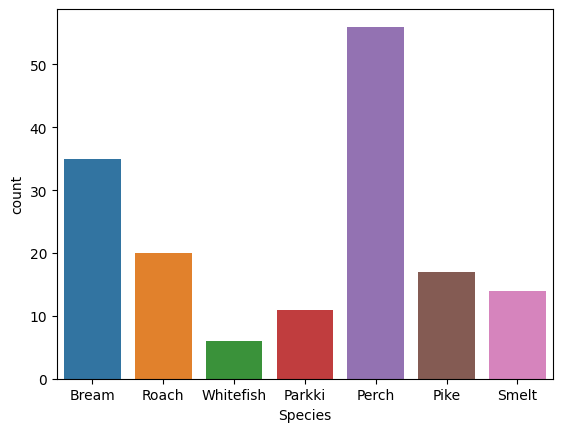

In [37]:
sns.countplot(x='Species',data=df_fish) # count plot to visualize the balance of the dataset. It confirms datset isn't balanced

### STEP 4: Relations
#### Find out the relation between fish species and fish features

In [38]:
df_fish.groupby('Species').mean() # Find average value of features for all the species of fish
# we get to know on average, the Pike species fish weighs the most and Smelt species fish weighs the least

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


<Axes: xlabel='Species', ylabel='Weight'>

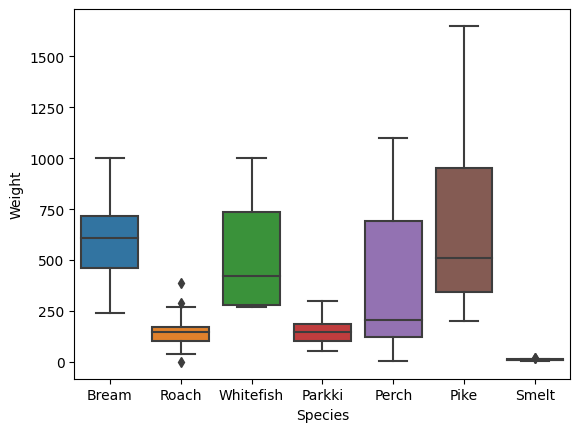

In [39]:
sns.boxplot(data = df_fish,x = 'Species',y = 'Weight')# visualize the relation between species and weight of fish

### So, lets compare the length, height, weight and width of all the species and use plots for better understanding

In [40]:
df_fish2=df_fish.copy() # copying data to another variable to make changes and not change original data
df_fish2['avg_length']=(df_fish2['Length1']+df_fish2['Length2']+df_fish2['Length3'])/3 #taking average of 3 diffrent type of lengths and adding to new column
df_fish2.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333


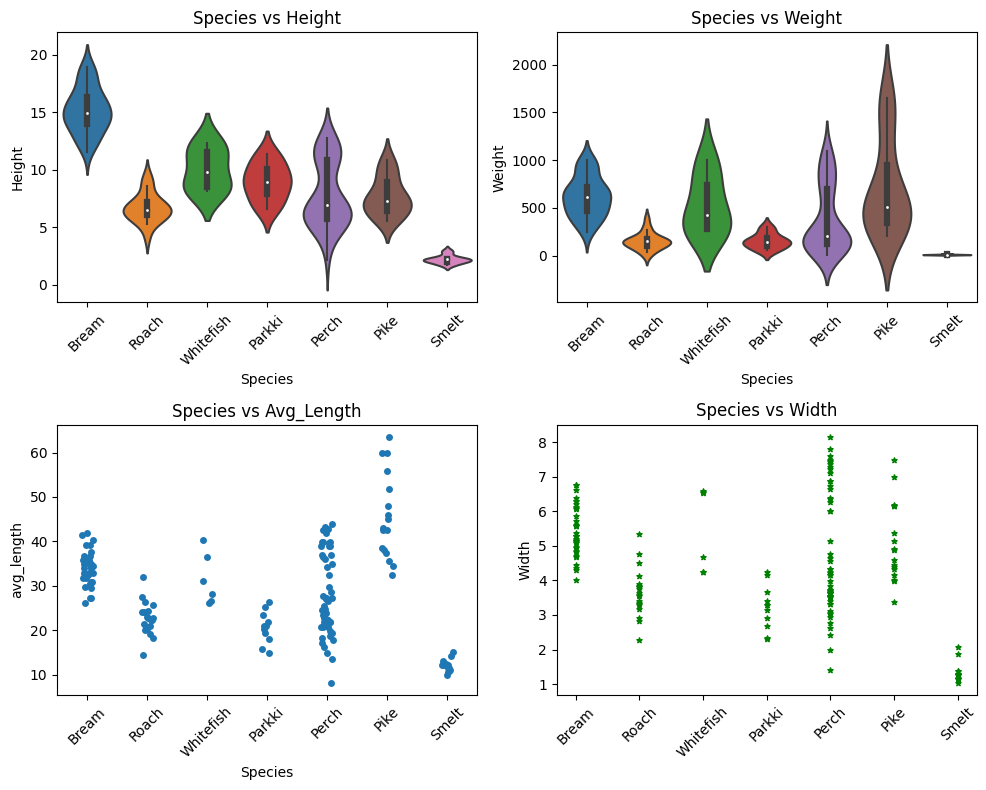

In [42]:
# now we can plot charts for different features and see their relation with the species.
fig = plt.figure( figsize=(10,8))
# plt.figure(1)
ax1 = fig.add_subplot(221)
sns.violinplot(x='Species', y='Height', data=df_fish, scale="width")
#sns.stripplot(x='Species', y='Height', data=df_fish2, jitter=True)
#plt.scatter(df_fish2['Species'],df_fish2['Weight'], c='red',s=10)
plt.xticks(rotation=45)
ax1.title.set_text('Species vs Height')
# plt.title('Species vs Weight')
# plt.figure(2)
ax2 = fig.add_subplot(222)
# plt.scatter(df_fish2['Species'],df_fish2['Height'], c='blue',s=10)
sns.violinplot(x='Species', y='Weight', data=df_fish, scale="width")
plt.xticks(rotation=45)
ax2.title.set_text('Species vs Weight')
# plt.figure(3)
ax3 = fig.add_subplot(223)
# plt.scatter(df_fish2['Species'],df_fish2['avg_length'],c='yellow',s=10)
sns.stripplot(x='Species', y='avg_length', data=df_fish2, jitter=True)
plt.xticks(rotation=45)
ax3.title.set_text('Species vs Avg_Length')
# plt.figure(4)
ax4 = fig.add_subplot(224)
plt.scatter(df_fish2['Species'],df_fish2['Width'],c='green',s=15,marker='*')
ax4.title.set_text('Species vs Width')
plt.ylabel('Width')
plt.xticks(rotation=45)
plt.tight_layout()



### STEP 5: Correlations

In [43]:
df_fish3=df_fish2.copy()
columns_to_drop = ['Species', 'Length1','Length2','Length3']
df_fish3=df_fish3.drop(columns=columns_to_drop, axis=1) #droping species since its string and Length 1,2,3 columns. 
df_fish3


,Weight,Height,Width,avg_length
0,242.0,11.5200,4.0200,26.200000
1,290.0,12.4800,4.3056,27.166667
2,340.0,12.3778,4.6961,27.166667
3,363.0,12.7300,4.4555,29.600000
4,430.0,12.4440,5.1340,29.833333
...,...,...,...,...
154,12.2,2.0904,1.3936,12.366667
155,13.4,2.4300,1.2690,12.533333
156,12.2,2.2770,1.2558,12.966667
157,19.7,2.8728,2.0672,14.233333


In [44]:
df_fish3.corr(method='pearson')


,Weight,Height,Width,avg_length
Weight,1.000000,0.724345,0.886507,0.920817
Height,0.724345,1.000000,0.792881,0.659481
Width,0.886507,0.792881,1.000000,0.874757
avg_length,0.920817,0.659481,0.874757,1.000000


#### From the below plot we can say that, there is a positive correlation between Weight and Length(also Width) of the fish
#### Whereas, the correlation between Weight and Height of a given fish is less

Text(0.5, 1.0, 'Correlation Plot')

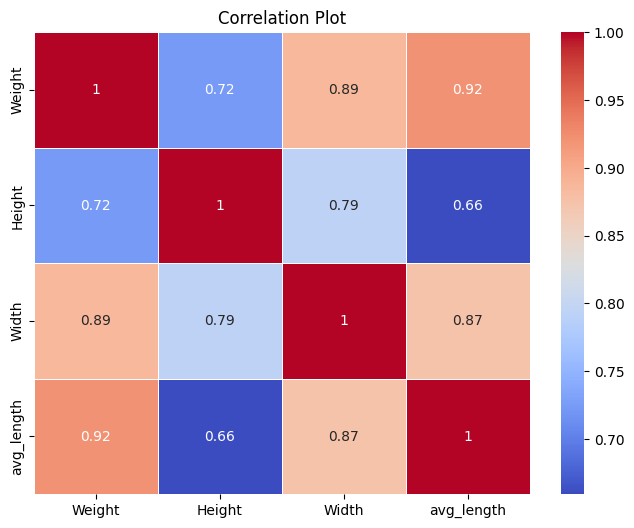

In [45]:
plt.figure(figsize=(8, 6))  # Setting the figure size
sns.heatmap(df_fish3.corr(method='pearson'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')

### STEP 6: Finding and treating outliers
#### We will use boxplots to spot outliers in the data

In [46]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### We will use boxplot to determine which columns(features) have outliers and treat these outliers.
#### From the plot, we find out weight ,length 1,length 2 and length 3 have outliers.

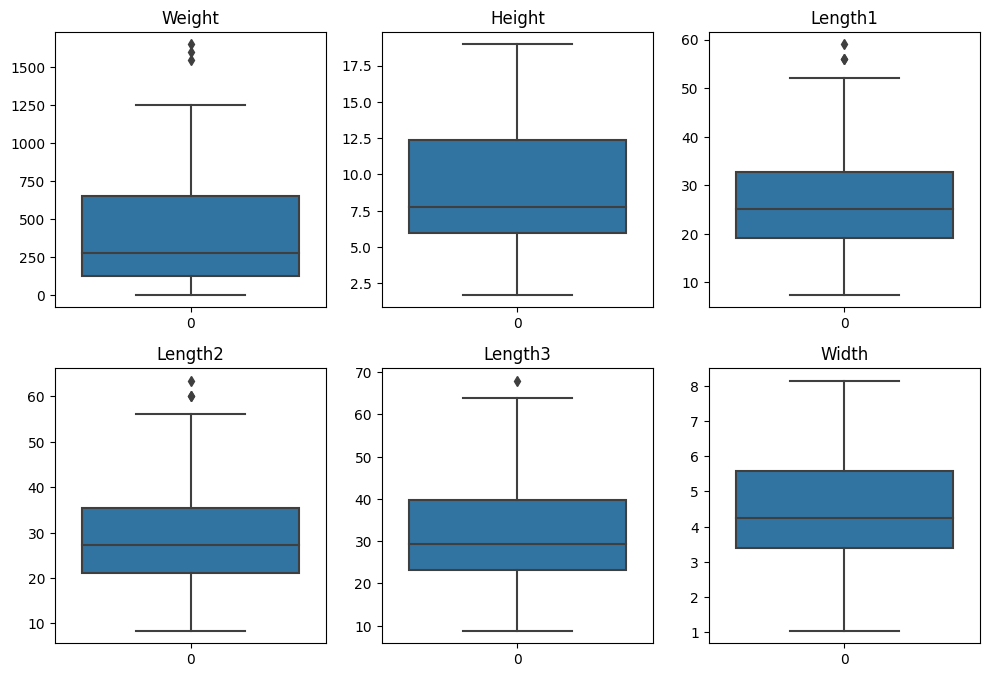

In [47]:
# using subplot to organise the plots
fig = plt.figure(figsize=(10, 10))
# plt.figure(1)
ax1 = fig.add_subplot(331)
sns.boxplot(df_fish['Weight'])
ax1.title.set_text('Weight')
# plt.figure(2)
ax2 = fig.add_subplot(332)
sns.boxplot(df_fish['Height'])
ax2.title.set_text('Height')
# plt.figure(3)
ax3 = fig.add_subplot(333)
sns.boxplot(df_fish['Length1'])
ax3.title.set_text('Length1')
# plt.figure(4)
ax4 = fig.add_subplot(334)
sns.boxplot(df_fish['Length2'])
ax4.title.set_text('Length2')
# plt.figure(5)
ax4 = fig.add_subplot(335)
sns.boxplot(df_fish['Length3'])
ax4.title.set_text('Length3')
# plt.figure(6)
ax4 = fig.add_subplot(336)
sns.boxplot(df_fish['Width'])
ax4.title.set_text('Width')
plt.tight_layout()


### Finding the outliers in the data
#### Z-score method: determine lower and higher limits

In [ ]:
# #for Weight column: Finding limits
# upper_W= df_fish['Weight'].mean() + 3*df_fish['Weight'].std()
# lower_W=df_fish['Weight'].mean() - 3*df_fish['Weight'].std()
# print('Upper limit for weight:', upper_W)
# print('Lower limit for weight:',lower_W)
# # since there are no outliers below the minimum value in dataset, we wont be needed to use the lower limit

In [ ]:
df_fish.shape #shape before removing outliers
# df_fish4=df_fish.copy()# copying to use new variable to remove outliers

In [ ]:
# #Finding outliers
# df_fish4.loc[(df_fish['Weight'] > upper_W) | (df_fish['Weight'] < lower_W)]

#### Here, we cannot simply drop the outliers because the dataset is small and it will lead to changes in data and its inferences. So, replacing the outliers with median of the values is best practice

In [ ]:
# median_W= df_fish['Weight'].median()
# print(median_W)

#### Using map function to replace the outliers with median weight

In [ ]:
# df_fish4['Weight']=df_fish4['Weight'].mask(df_fish4['Weight'] > upper_W ,median_W) 

In [ ]:
# # Similar to above process, we proceed for the other columns outliers
# #for length columns: Finding limits
# upper_l1= df_fish['Length1'].mean() + 3*df_fish['Length1'].std()
# lower_l1=df_fish['Length1'].mean() - 3*df_fish['Length1'].std()
# print('Upper limit for Length1:', upper_l1)
# print('Lower limit for Length1:',lower_l1)

# upper_l2= df_fish['Length2'].mean() + 3*df_fish['Length2'].std()
# lower_l2=df_fish['Length2'].mean() - 3*df_fish['Length2'].std()
# print('Upper limit for Length2:', upper_l2)
# print('Lower limit for Length2:',lower_l2)

# upper_l3= df_fish['Length3'].mean() + 3*df_fish['Length3'].std()
# lower_l3=df_fish['Length3'].mean() - 3*df_fish['Length3'].std()
# print('Upper limit for Length3:', upper_l3)
# print('Lower limit for Length3:',lower_l3)

In [ ]:
# # Similar to above process, we proceed for the other columns outliers
# median_l1= df_fish['Length1'].median()
# median_l2= df_fish['Length2'].median()
# median_l3= df_fish['Length3'].median()
# print(median_l1,median_l2,median_l3)

In [ ]:
# # using map fucntion with limits
# df_fish4['Length1']=df_fish4['Length1'].mask(df_fish4['Length1'] > upper_l1 ,median_l1) 
# df_fish4['Length2']=df_fish4['Length2'].mask(df_fish4['Length2'] > upper_l2,median_l2) 
# df_fish4['Length3']=df_fish4['Length3'].mask(df_fish4['Length3'] > upper_l3,median_l3) 

In [ ]:
# #### Plotting new dataframe with outliers replaced with median
# # using subplot to organise the plots
# fig = plt.figure(figsize=(10, 10))
# # plt.figure(1)
# ax1 = fig.add_subplot(331)
# sns.boxplot(df_fish4['Weight'])
# ax1.title.set_text('Weight')
# # plt.figure(2)
# ax2 = fig.add_subplot(332)
# sns.boxplot(df_fish4['Height'])
# ax2.title.set_text('Height')
# # plt.figure(3)
# ax3 = fig.add_subplot(333)
# sns.boxplot(df_fish4['Length1'])
# ax3.title.set_text('Length1')
# # plt.figure(4)
# ax4 = fig.add_subplot(334)
# sns.boxplot(df_fish4['Length2'])
# ax4.title.set_text('Length2')
# # plt.figure(5)
# ax4 = fig.add_subplot(335)
# sns.boxplot(df_fish4['Length3'])
# ax4.title.set_text('Length3')
# # plt.figure(6)
# ax4 = fig.add_subplot(336)
# sns.boxplot(df_fish4['Width'])
# ax4.title.set_text('Width')
# plt.tight_layout()

### IQR method
#### Finding q1,q3,iqr for all 3 columns with outliers

In [48]:
df_fish4=df_fish.copy()
# Weight column
q1_W= df_fish['Weight'].quantile(0.25) #First quartile
q3_W=df_fish['Weight'].quantile(0.75)# 3rd quartile
iqr_W=q3_W - q1_W   # finding IQR
upper_W= q3_W + (1.5*iqr_W) #upper limit formula
lower_W= q1_W- (1.5*iqr_W) #lower limit formula

In [49]:
# Length 1
q1_l1= df_fish['Length1'].quantile(0.25) #First quartile
q3_l1=df_fish['Length1'].quantile(0.75)# 3rd quartile
iqr_l1=q3_l1 - q1_l1
upper_l1= q3_l1 + (1.5*iqr_l1)
lower_l1= q1_l1- (1.5*iqr_l1)

In [50]:
# Length 2
q1_l2= df_fish['Length2'].quantile(0.25) #First quartile
q3_l2=df_fish['Length2'].quantile(0.75)# 3rd quartile
iqr_l2=q3_l2 - q1_l2 
upper_l2= q3_l2 + (1.5*iqr_l2)
lower_l2= q1_l2- (1.5*iqr_l2)

In [51]:
# Length 3
q1_l3= df_fish['Length3'].quantile(0.25) #First quartile
q3_l3=df_fish['Length3'].quantile(0.75)# 3rd quartile
iqr_l3=q3_l3 - q1_l3
upper_l3= q3_l2 + (1.5*iqr_l3)
lower_l3= q1_l3- (1.5*iqr_l3)

In [52]:
df_fish4.shape

(159, 7)

In [53]:
#capping and Filterting data
df_fish4.loc[(df_fish4['Weight']> upper_W), 'Weight']=upper_W
df_fish4.loc[(df_fish4['Weight']< lower_W), 'Weight']=lower_W

df_fish4.loc[(df_fish4['Length1']> upper_l1), 'Length1']=upper_l1
df_fish4.loc[(df_fish4['Length1']< lower_l1), 'Length1']=lower_l1

df_fish4.loc[(df_fish4['Length2']> upper_l2), 'Length2']=upper_l2
df_fish4.loc[(df_fish4['Length2']< lower_l2), 'Length2']=lower_l2

df_fish4.loc[(df_fish4['Length3']> upper_l3), 'Length3']=upper_l3
df_fish4.loc[(df_fish4['Length3']< lower_l3), 'Length3']=lower_l3



In [54]:
df_fish4.shape

(159, 7)

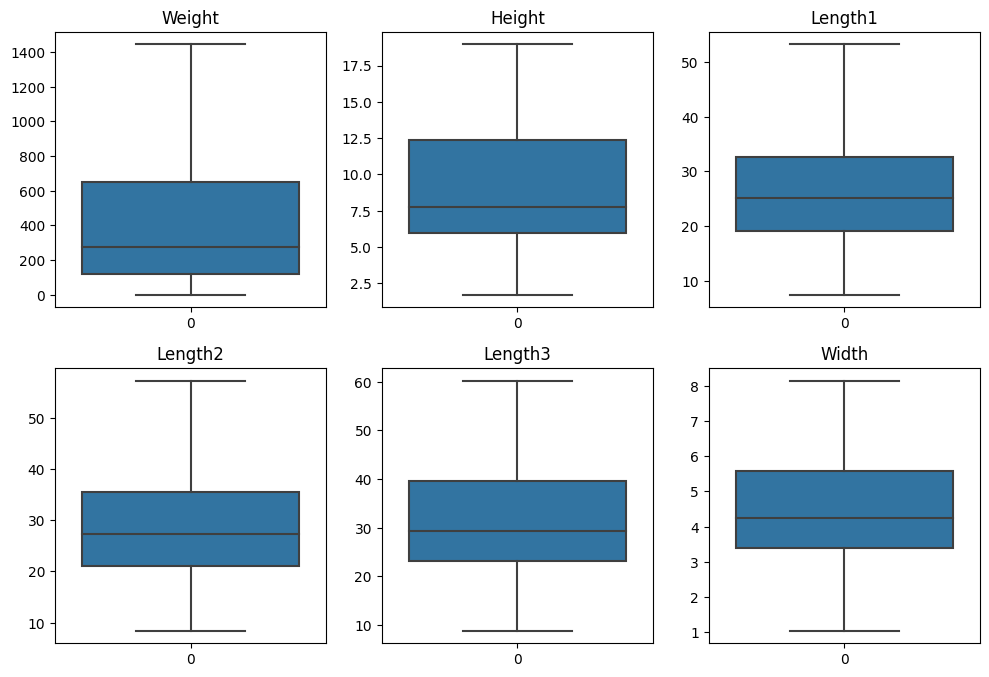

In [55]:
#Plotting new dataframe with outliers replaced with median
# using subplot to organise the plots
fig = plt.figure(figsize=(10, 10))
# plt.figure(1)
ax1 = fig.add_subplot(331)
sns.boxplot(df_fish4['Weight'])
ax1.title.set_text('Weight')
# plt.figure(2)
ax2 = fig.add_subplot(332)
sns.boxplot(df_fish4['Height'])
ax2.title.set_text('Height')
# plt.figure(3)
ax3 = fig.add_subplot(333)
sns.boxplot(df_fish4['Length1'])
ax3.title.set_text('Length1')
# plt.figure(4)
ax4 = fig.add_subplot(334)
sns.boxplot(df_fish4['Length2'])
ax4.title.set_text('Length2')
# plt.figure(5)
ax4 = fig.add_subplot(335)
sns.boxplot(df_fish4['Length3'])
ax4.title.set_text('Length3')
# plt.figure(6)
ax4 = fig.add_subplot(336)
sns.boxplot(df_fish4['Width'])
ax4.title.set_text('Width')
plt.tight_layout()

### Hence, the outliers in the dataset have been removed.

## STEP 7: Extra_EDA

[Text(0.5, 1.0, 'Weight Vs Height')]

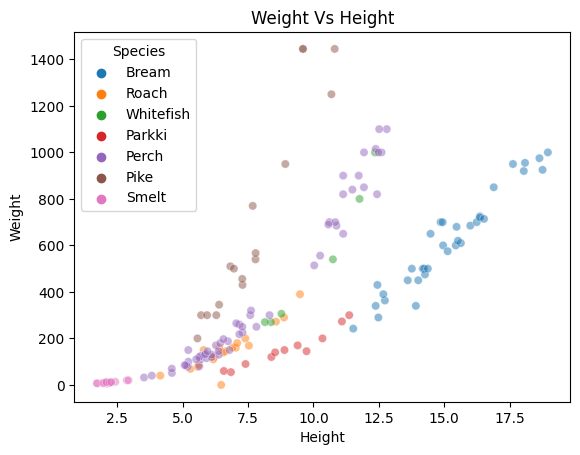

In [85]:
#Grouping the weight vs height data based on species
sns.scatterplot(x='Height',y='Weight',data=df_fish4, hue='Species', alpha=0.5).set(title='Weight Vs Height')


C:\Users\Chirag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


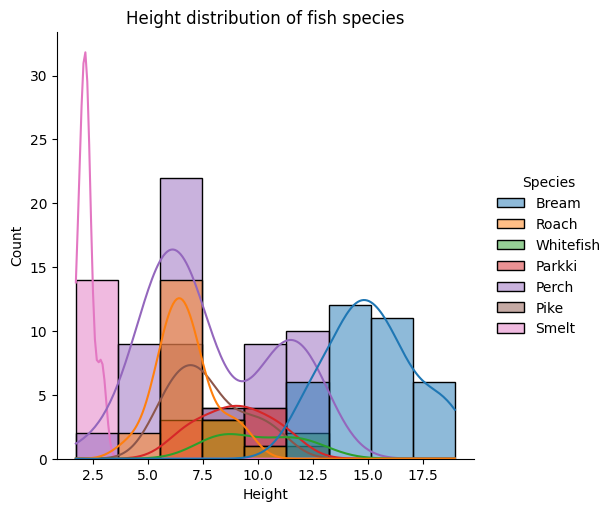

In [86]:
#distribution plot using kernel densitity estimatin(kde)
sns.displot(data=df_fish4, x="Height", kde=True, hue='Species').set(title='Height distribution of fish species')

C:\Users\Chirag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


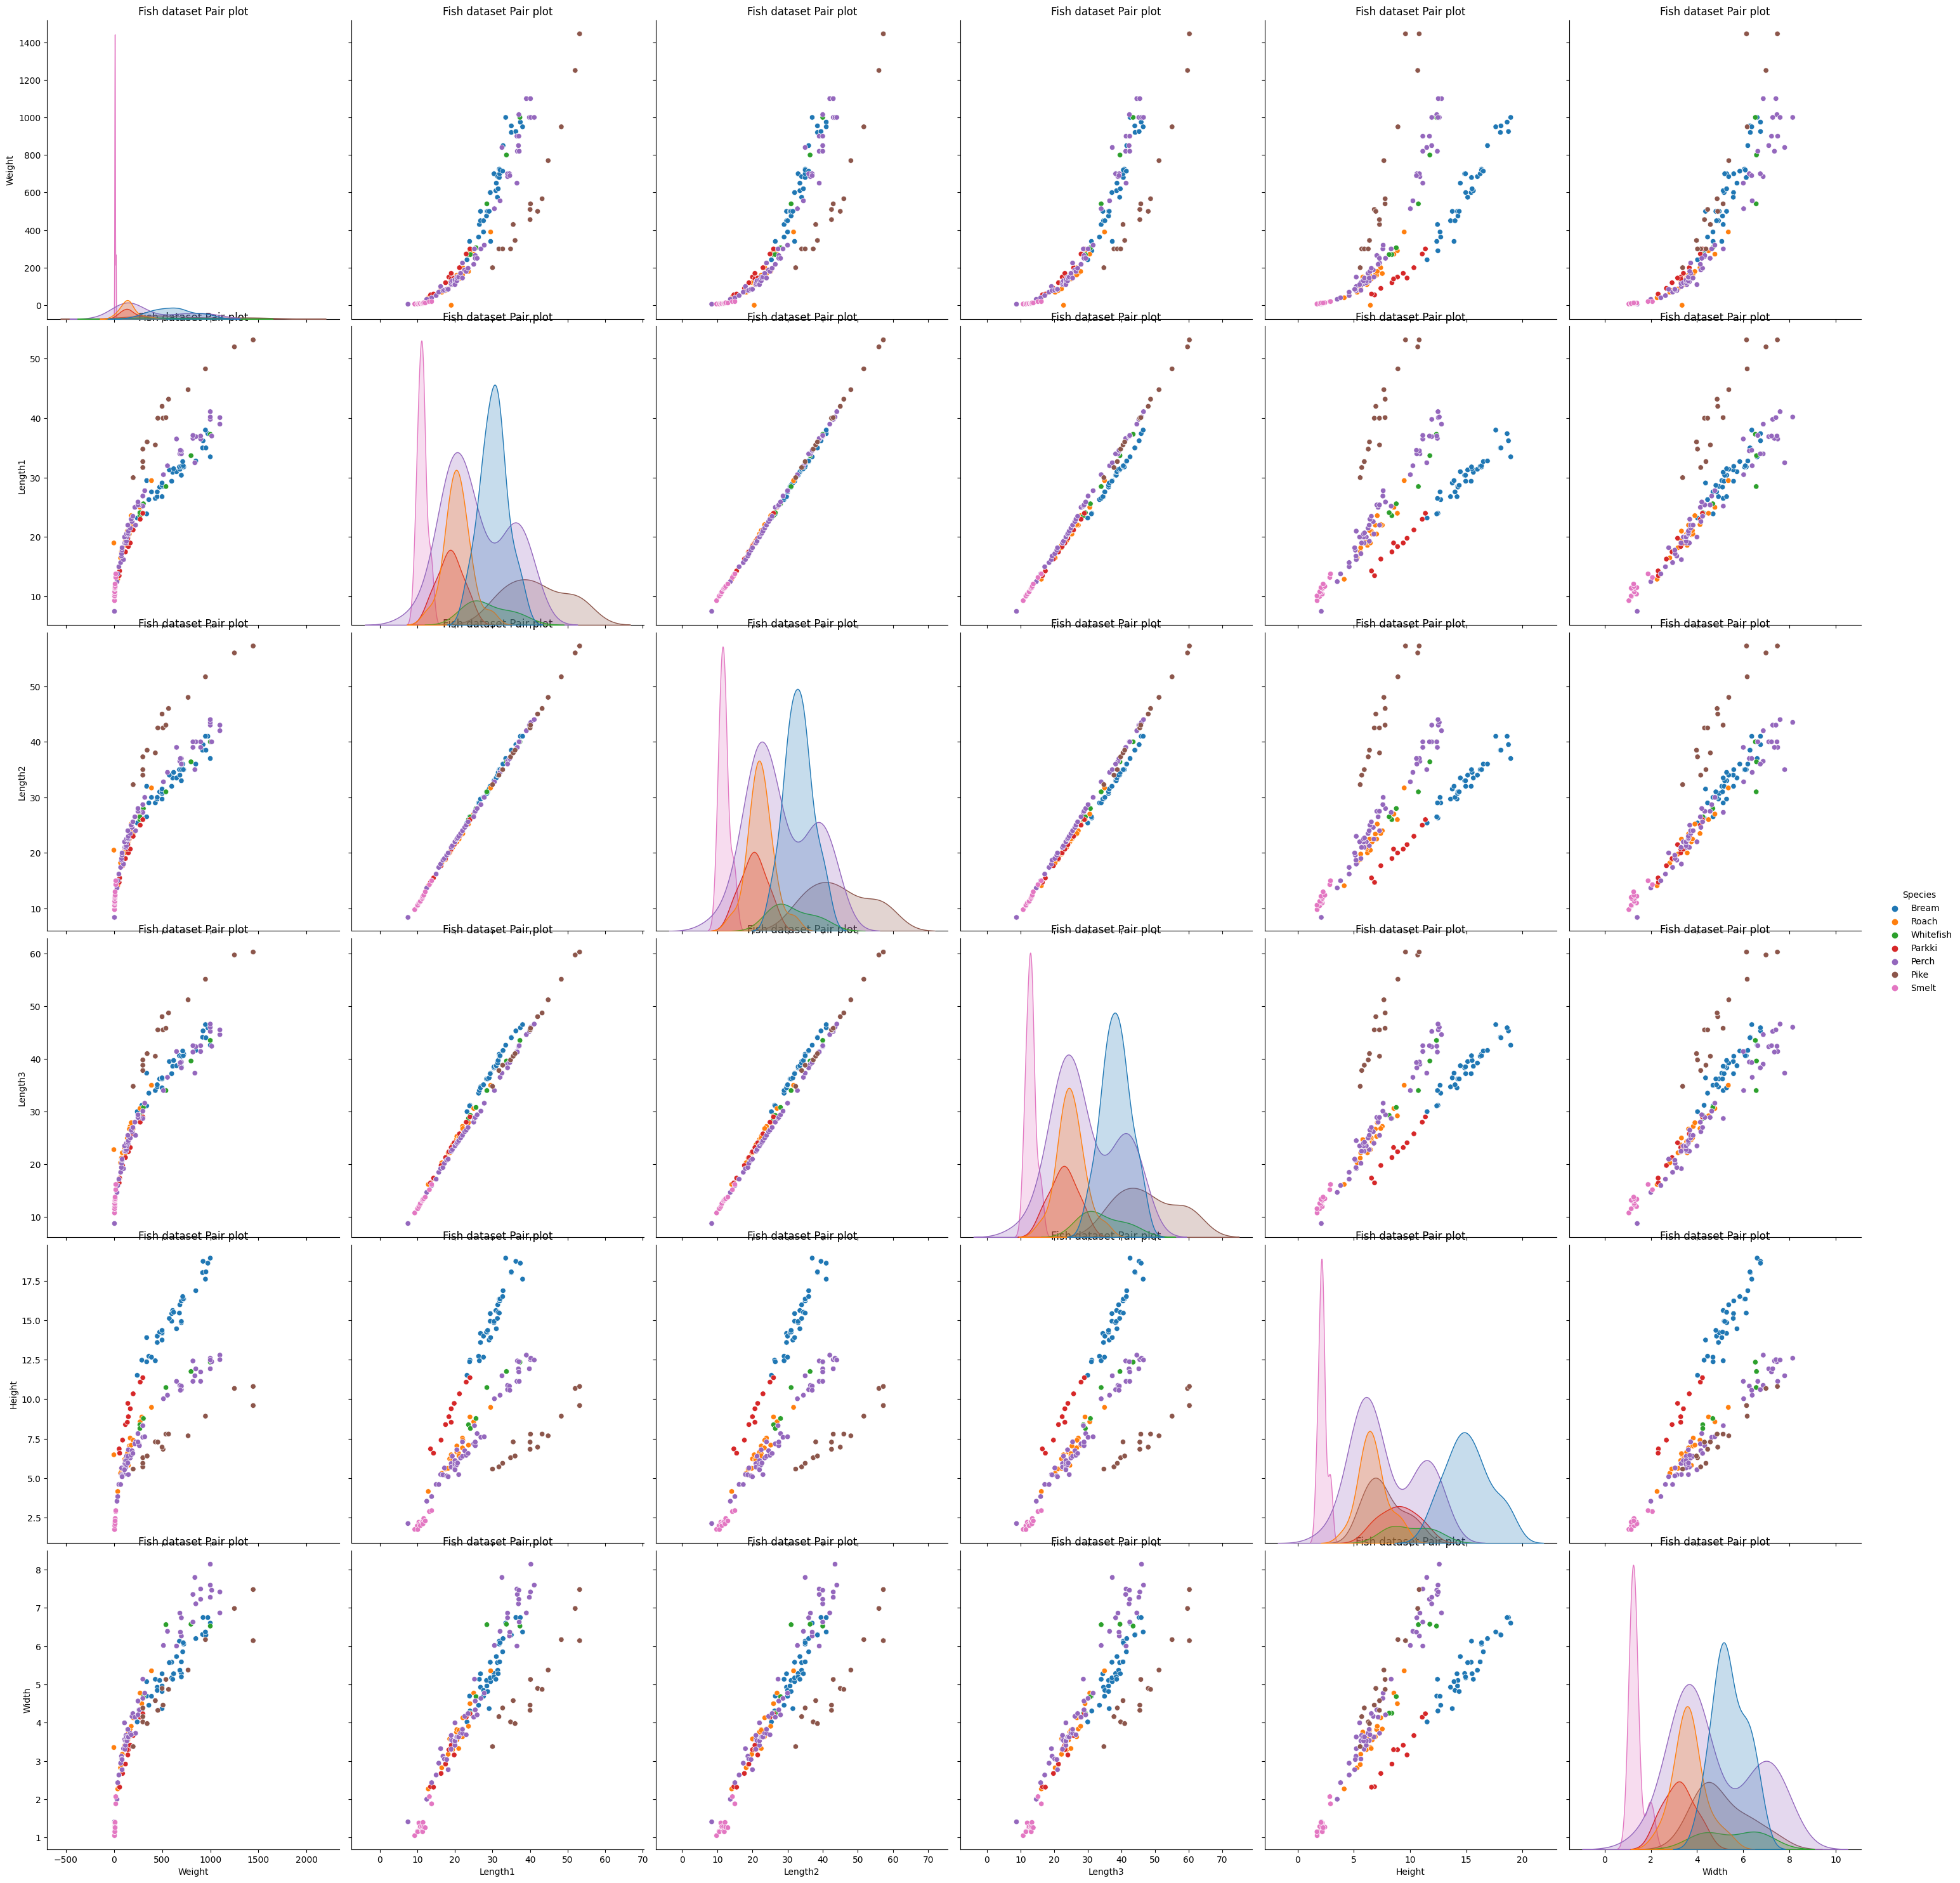

In [90]:
# Pair plot
sns.pairplot(df_fish4, hue='Species', height=5).set(title='Fish dataset Pair plot')

[Text(0.5, 1.0, 'Radial visualization of fish features')]

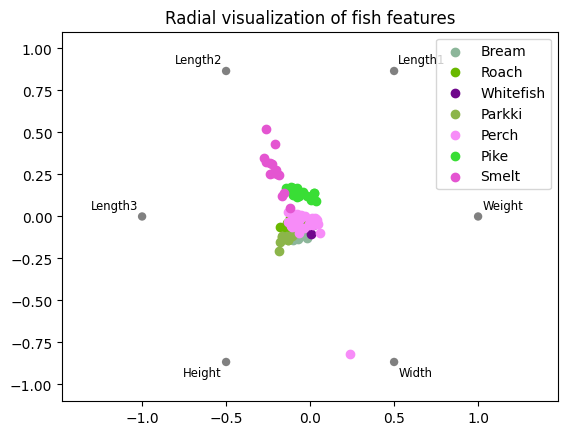

In [91]:
# Radial Visualization
import pandas.plotting as pdplt
pdplt.radviz(df_fish4, 'Species').set(title='Radial visualization of fish features')

[Text(0.5, 1.0, 'Variability in the dataset')]

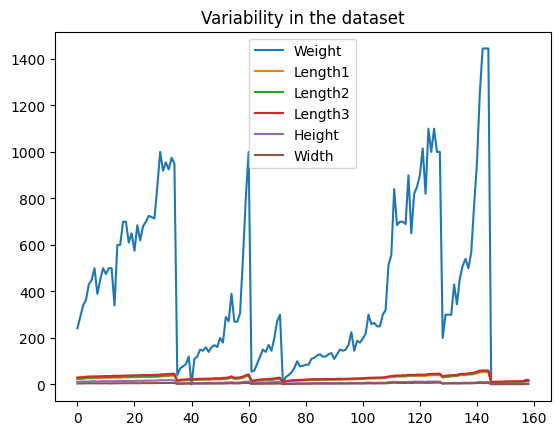

In [92]:
df_fish4.plot().set(title='Variability in the dataset')

<Axes: ylabel='count'>

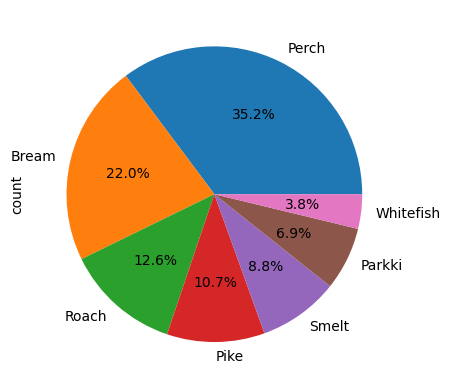

In [95]:
# percentage of data set
import plotly.express as px
df_fish4['Species'].value_counts().plot.pie(autopct='%1.1f%%' )